# 5주차 과제 60191095 강하연

## Titanic 승객 데이터로 의사결정나무 만들기

### 1. 데이터셋 로딩

In [41]:
# 패키지 불러오기 
import pandas as pd
import numpy as np 
from sklearn import model_selection
from sklearn import metrics 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.tree import DecisionTreeClassifier

In [42]:
# 데이터프레임으로 데이터 읽어오기
dt = pd.read_csv('/Users/hayeon/Downloads/2021-2(3-2)/머신러닝/data/titanic.csv', index_col=['PassengerId'])
print(dt.shape)
dt.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. 데이터 전처리

In [43]:
# 필요없는 컬럼 제거 
df = dt.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250
4,1,1,female,35.0,1,0,53.1000
5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000
888,1,1,female,19.0,0,0,30.0000
889,0,3,female,NaN,1,2,23.4500


In [44]:
# 전처리: 진위형 변수로 변경 
df['Sex'] = df.Sex.map({'female':0, 'male':1})

In [45]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,1,22.0,1,0,7.2500
2,1,1,0,38.0,1,0,71.2833
3,1,3,0,26.0,0,0,7.9250
4,1,1,0,35.0,1,0,53.1000
5,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000
888,1,1,0,19.0,0,0,30.0000
889,0,3,0,NaN,1,2,23.4500


In [46]:
# 결측치 확인 
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [47]:
# 중간값으로 결측치 채워주기 
df.Age.fillna(df.Age.median(), inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,1,22.0,1,0,7.2500
2,1,1,0,38.0,1,0,71.2833
3,1,3,0,26.0,0,0,7.9250
4,1,1,0,35.0,1,0,53.1000
5,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000
888,1,1,0,19.0,0,0,30.0000
889,0,3,0,28.0,1,2,23.4500


In [48]:
# input 변수와 Output 변수 구분 
X = np.array(df.iloc[:, 1:])
y = np.array(df['Survived'])

In [49]:
X

array([[ 3.    ,  1.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  0.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 3.    ,  0.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 3.    ,  0.    , 28.    ,  1.    ,  2.    , 23.45  ],
       [ 1.    ,  1.    , 26.    ,  0.    ,  0.    , 30.    ],
       [ 3.    ,  1.    , 32.    ,  0.    ,  0.    ,  7.75  ]])

In [50]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

## 3. 모델 적합 

In [51]:
# 트레이닝 세트와 테스트 세트로 데이터 구분 (여기서는 7:3으로 구분)
from sklearn.model_selection import train_test_split

# random_state는 반복적으로 같은 결과를 내기 위해서 설정 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("X_train 크기: ", X_train.shape)
print("X_test 크기: ", X_test.shape)
print("y_train 크기: ", y_train.shape)
print("y_test 크기: ", y_test.shape)

X_train 크기:  (623, 6)
X_test 크기:  (268, 6)
y_train 크기:  (623,)
y_test 크기:  (268,)


In [52]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0, max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

## 4. 모델 성능평가

In [53]:
temp_y_pred = tree.predict(X_test)

# Training 값을 X_test에서 넣음 
print('예측값\n', temp_y_pred)
print('실제값\n', y_test)

예측값
 [0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1
 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 1 0]
실제값
 [0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1
 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1

In [54]:
# 정확도 계산 
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

temp_acc = accuracy_score(y_test, temp_y_pred)

# y_test와 temp_y_pred로 예측한 값을 적용하여 temp_acc를 추출함 
print('정확도: ', format(temp_acc))

정확도:  0.8208955223880597


In [55]:
# 오차행렬 (Confusion Matrix)
print(confusion_matrix(y_test, temp_y_pred))

[[146  22]
 [ 26  74]]


In [56]:
# 모델 성능 
print(classification_report((tree.predict(X_test)>0.5).astype('int16'), y_test))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       172
           1       0.74      0.77      0.76        96

    accuracy                           0.82       268
   macro avg       0.80      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



---
# 와인 품질 분류 모델 (60191095 강하연)

## 1. 데이터셋 로딩

In [57]:
data = pd.read_csv('/Users/hayeon/Downloads/2021-2(3-2)/머신러닝/data/winequality-red.csv')
print(data.shape)
data.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [58]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### 2. 데이터 전처리

In [59]:
# 클래스 나누기 
# 6, 7, 8 : 1 (품질 좋은 와인) / 3, 4, 5 : 0 (품질 나쁜 와인) 
data.loc[data.quality.isin([3, 4, 5]),'quality']=0
data.loc[data.quality.isin([6, 7, 8]),'quality']=1

In [60]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [61]:
# input 변수와 Output 변수 구분 
X = np.array(data.iloc[:, :-1])
y = np.array(data['quality'])

In [62]:
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [63]:
y

array([0, 0, 0, ..., 1, 0, 1])

### 3. 모델 적합

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("X_train 크기: ", X_train.shape)
print("X_test 크기: ", X_test.shape)
print("y_train 크기: ", y_train.shape)
print("y_test 크기: ", y_test.shape)

X_train 크기:  (1119, 11)
X_test 크기:  (480, 11)
y_train 크기:  (1119,)
y_test 크기:  (480,)


In [66]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

### 4. 모델 성능평가

In [67]:
y_pred = tree.predict(X_test)

# Training 값을 X_test에서 넣음 
print('예측값\n', y_pred)
print('실제값\n', y_test)

예측값
 [1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1
 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0
 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1
 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1
 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0
 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1
 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1
 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0
 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0
 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1
 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0
 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0]
실제값
 [1 0 1 1 0 1 0 1

In [68]:
wine_acc = accuracy_score(y_test, y_pred)

# y_test와 temp_y_pred로 예측한 값을 적용하여 temp_acc를 추출함 
print('정확도: ', format(wine_acc))

정확도:  0.7229166666666667


In [69]:
# 오차행렬 (Confusion Matrix)
print(confusion_matrix(y_test, y_pred))

[[155  71]
 [ 62 192]]


In [72]:
# 모델 성능 
print(classification_report((tree.predict(X_test)>0.5).astype('int16'), y_test))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70       217
           1       0.76      0.73      0.74       263

    accuracy                           0.72       480
   macro avg       0.72      0.72      0.72       480
weighted avg       0.72      0.72      0.72       480



In [32]:
import graphviz
from sklearn.tree import export_graphviz

# 와인품질 분류 모델

In [33]:
train_scores, test_scores = list(), list()

# 의사결정 나무 모델의 depth 조절 (1부터 19까지)
for i in range(1, 20):
    DT1 = DecisionTreeClassifier(max_depth=i)
    # 깊이를 증가시키면서 의사결정나무 모델 적합 
    DT1.fit(X_train, y_train)
    
    # training dataset 정확도 평가 
    train_att = DT1.predict(X_train)
    train_acc = accuracy_score(y_train, train_att)
    train_scores.append(train_acc)
    
    # test dataseet 정확도 평가 
    test_att = DT1.predict(X_test)
    test_acc = accuracy_score(y_test, test_att)
    test_scores.append(test_acc)
    
    # Train 정확도와 Test 정확도를 depth 개수에 따른 정확도 확인 
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
    
    

>1, train: 0.699, test: 0.717
>2, train: 0.699, test: 0.717
>3, train: 0.752, test: 0.690
>4, train: 0.767, test: 0.700
>5, train: 0.804, test: 0.721
>6, train: 0.849, test: 0.704
>7, train: 0.886, test: 0.706
>8, train: 0.916, test: 0.729
>9, train: 0.949, test: 0.715
>10, train: 0.970, test: 0.729
>11, train: 0.985, test: 0.715
>12, train: 0.993, test: 0.729
>13, train: 0.996, test: 0.727
>14, train: 0.998, test: 0.710
>15, train: 1.000, test: 0.719
>16, train: 1.000, test: 0.727
>17, train: 1.000, test: 0.731
>18, train: 1.000, test: 0.729
>19, train: 1.000, test: 0.735


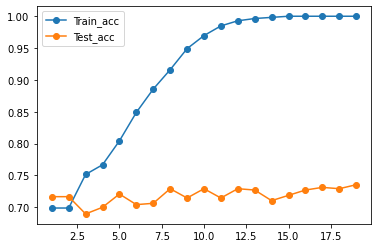

In [34]:
from matplotlib import pyplot 

pyplot.plot(range(1, 20), train_scores, '-o', label='Train_acc')
pyplot.plot(range(1, 20), test_scores, '-o', label='Test_acc')
pyplot.legend()
pyplot.show()



In [35]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

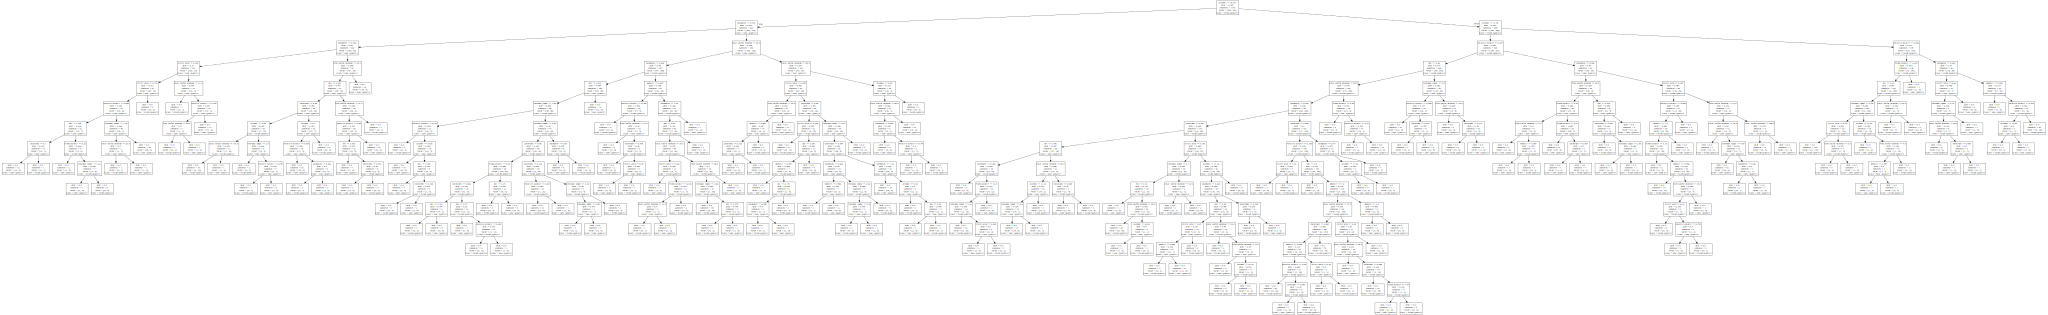

In [36]:
feature_name = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
tree = export_graphviz(tree, feature_names=feature_name, 
                      class_names = ['Low Quality','High Quality'])

graphviz.Source(tree)

* sulphates가 0.695 이하이고 PH가 3.475 이하이면 Low Quality 이다.
* sulphates가 0.535 이하이고 free sulfur dioxide가 22.5 이하이면 Low Quality이다 .